# Initialization

## Importing Libraries and creating folders

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import cv2
import random
from PIL import Image, ImageEnhance
import keras
from datetime import datetime

from tensorflow.keras.layers import  Input, Conv2D, BatchNormalization, Activation, Lambda, Subtract, ZeroPadding2D, GlobalAveragePooling2D, Dense, Add, Concatenate, UpSampling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input 
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, Reshape, Dense 

from tensorflow.keras.models import Model 
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg
from google.colab import files
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!unrar x "/content/gdrive/MyDrive/DATA.rar"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/gdrive/MyDrive/DATA.rar

Creating    DATA                                                      OK
Creating    DATA/test                                                 OK
Creating    DATA/test/mask                                            OK
Extracting  DATA/test/mask/m_te (1).tif                                    0%  OK 
Extracting  DATA/test/mask/m_te (10).tif                                   0%  OK 
Extracting  DATA/test/mask/m_te (11).tif                                   0%  OK 
Extracting  DATA/test/mask/m_te (12).tif                                   0%  OK 
Extracting  DATA/test/mask/m_te (13).tif                                   0%  OK 
Extracting  DATA/test/mask/m_te (14).tif                                   0%  OK 
Extracting  DATA/test/mask/m_te (2).tif                                    0%  OK 
Extracting 

In [4]:
train_raw = "/content/DATA/train/raw"
train_lbl = "/content/DATA/train/mask"
test_raw = "/content/DATA/test/raw"
test_lbl = "/content/DATA/test/mask"
val_raw = "/content/DATA/val/raw"
val_lbl = "/content/DATA/val/mask"

In [5]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(train_raw)

There are 0 directories and 106 images in '/content/DATA/train/raw'.


In [7]:
walk_through_dir(test_raw)

There are 0 directories and 14 images in '/content/DATA/test/raw'.


In [8]:
walk_through_dir(val_raw)

There are 0 directories and 15 images in '/content/DATA/val/raw'.


In [9]:
tr_raw_list = os.listdir(train_raw)
tr_mask_list = os.listdir(train_lbl)

tr_raw_list.sort()
tr_mask_list.sort()

print(tr_raw_list)
print(tr_mask_list)

['r (1).tif', 'r (10).tif', 'r (100).tif', 'r (101).tif', 'r (102).tif', 'r (103).tif', 'r (104).tif', 'r (105).tif', 'r (106).tif', 'r (11).tif', 'r (12).tif', 'r (13).tif', 'r (14).tif', 'r (15).tif', 'r (16).tif', 'r (17).tif', 'r (18).tif', 'r (19).tif', 'r (2).tif', 'r (20).tif', 'r (21).tif', 'r (22).tif', 'r (23).tif', 'r (24).tif', 'r (25).tif', 'r (26).tif', 'r (27).tif', 'r (28).tif', 'r (29).tif', 'r (3).tif', 'r (30).tif', 'r (31).tif', 'r (32).tif', 'r (33).tif', 'r (34).tif', 'r (35).tif', 'r (36).tif', 'r (37).tif', 'r (38).tif', 'r (39).tif', 'r (4).tif', 'r (40).tif', 'r (41).tif', 'r (42).tif', 'r (43).tif', 'r (44).tif', 'r (45).tif', 'r (46).tif', 'r (47).tif', 'r (48).tif', 'r (49).tif', 'r (5).tif', 'r (50).tif', 'r (51).tif', 'r (52).tif', 'r (53).tif', 'r (54).tif', 'r (55).tif', 'r (56).tif', 'r (57).tif', 'r (58).tif', 'r (59).tif', 'r (6).tif', 'r (60).tif', 'r (61).tif', 'r (62).tif', 'r (63).tif', 'r (64).tif', 'r (65).tif', 'r (66).tif', 'r (67).tif', 'r (

In [10]:
te_img_list = os.listdir(test_raw)
te_mask_list = os.listdir(test_lbl)

te_img_list.sort()
te_mask_list.sort()

print(te_img_list)
print(te_mask_list)

['r_te (1).tif', 'r_te (10).tif', 'r_te (11).tif', 'r_te (12).tif', 'r_te (13).tif', 'r_te (14).tif', 'r_te (2).tif', 'r_te (3).tif', 'r_te (4).tif', 'r_te (5).tif', 'r_te (6).tif', 'r_te (7).tif', 'r_te (8).tif', 'r_te (9).tif']
['m_te (1).tif', 'm_te (10).tif', 'm_te (11).tif', 'm_te (12).tif', 'm_te (13).tif', 'm_te (14).tif', 'm_te (2).tif', 'm_te (3).tif', 'm_te (4).tif', 'm_te (5).tif', 'm_te (6).tif', 'm_te (7).tif', 'm_te (8).tif', 'm_te (9).tif']


In [11]:
val_img_list = os.listdir(val_raw)
val_mask_list = os.listdir(val_lbl)

val_img_list.sort()
val_mask_list.sort()

print(val_img_list)
print(val_mask_list)

['r_v (1).tif', 'r_v (10).tif', 'r_v (11).tif', 'r_v (12).tif', 'r_v (13).tif', 'r_v (14).tif', 'r_v (15).tif', 'r_v (2).tif', 'r_v (3).tif', 'r_v (4).tif', 'r_v (5).tif', 'r_v (6).tif', 'r_v (7).tif', 'r_v (8).tif', 'r_v (9).tif']
['m_v (1).tif', 'm_v (10).tif', 'm_v (11).tif', 'm_v (12).tif', 'm_v (13).tif', 'm_v (14).tif', 'm_v (15).tif', 'm_v (2).tif', 'm_v (3).tif', 'm_v (4).tif', 'm_v (5).tif', 'm_v (6).tif', 'm_v (7).tif', 'm_v (8).tif', 'm_v (9).tif']


## Displaying random data from both images and masks

In [13]:
#function to display random images from the directories
def display_img(img_dir, num):
  img_list = os.listdir(img_dir)
  img_list.sort()
  im_path = os.path.join(img_dir, img_list[num])
  im = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)
  im = cv2.resize(im, (1024, 1024), interpolation=cv2.INTER_AREA)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()
  print("Shape of the image: ", im.shape)
  print("Image name: ", img_list[num])

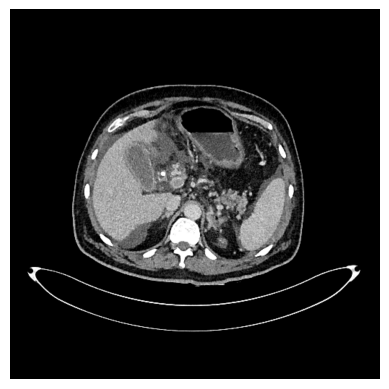

Shape of the image:  (1024, 1024, 4)
Image name:  r (66).tif


In [14]:
#displaying the original image
display_img(img_dir=train_raw, num=69)

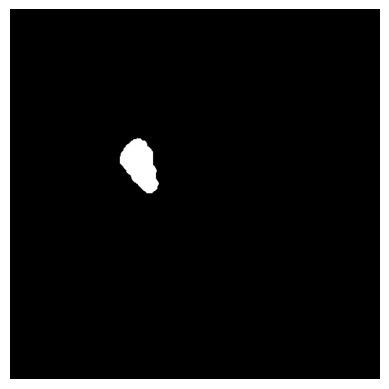

Shape of the image:  (1024, 1024, 3)
Image name:  m (66).tif


In [15]:
#displaying the mask
display_img(img_dir=train_lbl, num=69)

## Data Augmentation

In [ ]:
!mkdir /content/GBC_Dataset/train_gbc/Raw_Aug
!mkdir /content/GBC_Dataset/train_gbc/Label_Aug

mkdir: cannot create directory ‘/content/GBC_Dataset/train_gbc/Raw_Aug’: No such file or directory
mkdir: cannot create directory ‘/content/GBC_Dataset/train_gbc/Label_Aug’: No such file or directory


In [ ]:
!rm -rf "/content/GBC_Dataset/train_gbc/Label_Aug"
!rm -rf "/content/GBC_Dataset/train_gbc/Raw_Aug"

In [ ]:
train_raw_aug = "/content/GBC_Dataset/train_gbc/Raw_Aug"
train_lbl_aug = "/content/GBC_Dataset/train_gbc/Label_Aug"

In [ ]:
# augment both raw and labeled data
def aug_data_flip_rl(src_dir, dest_dir, br=1):
  img_list = os.listdir(src_dir)
  for i in range(len(img_list)):
    im_path = os.path.join(src_dir, img_list[i])
    im = Image.open(im_path)
    im = im.transpose(Image.FLIP_LEFT_RIGHT)
    bright = ImageEnhance.Brightness(im)
    bright.enhance(br).save(dest_dir+'/'+img_list[i].split('.')[0]+'_aug_rl'+'.tif')

In [ ]:
def aug_data_flip_tb(src_dir, dest_dir, br=1):
  img_list = os.listdir(src_dir)
  for i in range(len(img_list)):
    im_path = os.path.join(src_dir, img_list[i])
    im = Image.open(im_path)
    im = im.transpose(Image.FLIP_TOP_BOTTOM)
    bright = ImageEnhance.Brightness(im)
    bright.enhance(br).save(dest_dir+'/'+img_list[i].split('.')[0]+'_aug_tb'+'.tif')

In [ ]:
def aug_data_rot_72(src_dir, dest_dir, br=1):
  img_list = os.listdir(src_dir)
  rot = 72
  ct = 0
  for i in range(5):
    for j in range(len(img_list)):
      im_path = os.path.join(src_dir, img_list[j])
      im = Image.open(im_path)
      print(im_path)
      im = im.rotate(rot)
      bright = ImageEnhance.Brightness(im)
      bright.enhance(br).save(dest_dir+'/'+img_list[j].split('.')[0]+'_aug_rot_'+str(i)+'.tif')
      ct += 1
    rot += 72
  print(ct)

In [ ]:
!rm -rf "/content/GBC_Dataset/train_gbc/Raw_Aug/.ipynb_checkpoints"

In [ ]:
aug_data_rot_72(train_lbl, train_lbl_aug, br=1.25)

In [ ]:
walk_through_dir(train_lbl_aug)

In [ ]:
aug_data_flip_rl(train_lbl_aug, train_lbl_aug, br=1.1)

In [ ]:
walk_through_dir(train_lbl_aug)

In [ ]:
aug_data_flip_tb(train_lbl_aug, train_lbl_aug, br=1.1)

In [ ]:
walk_through_dir(train_lbl_aug)

In [ ]:
!zip -r "/content/GBC_Dataset/train_gbc/Label_Aug.zip" "/content/GBC_Dataset/train_gbc/Label_Aug"

## Dataset Creation

In [16]:
#function to create dataset
SIZE = 256
def create_dataset(image_dir, im_col=1):
  img_array = []
  img_list = os.listdir(image_dir)
  img_list.sort()
  for i, image_name in enumerate(img_list):
    if (image_name.split('.')[1] == 'tif'):
        #print(image_directory+image_name)
        image = cv2.imread(os.path.join(image_dir, img_list[i]), im_col)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image = np.array(image)/255.
        img_array.append(image)
  return np.array(img_array)

In [17]:
X_train = create_dataset(train_raw, im_col=3)
y_train = create_dataset(train_lbl, im_col=0)

In [18]:
y_train = np.expand_dims(y_train, axis=-1)

In [19]:
# # splitting the dataset into training and validation datasets

# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(img_dataset, mask_dataset, test_size = 0.10, random_state = 42)

In [20]:
X_test = create_dataset(test_raw, im_col=3)
y_test = create_dataset(test_lbl, im_col=0)

In [21]:
y_test = np.expand_dims(y_test, axis=-1)

In [22]:
X_val = create_dataset(val_raw, im_col=3)
y_val = create_dataset(val_lbl, im_col=0)

In [23]:
y_val = np.expand_dims(y_val, axis=-1)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(106, 256, 256, 3)
(14, 256, 256, 3)
(15, 256, 256, 3)
(106, 256, 256, 1)
(14, 256, 256, 1)
(15, 256, 256, 1)


#Model Creation and Execution

## Defining the metrics

In [25]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def expend_as(tensor, rep):
     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)

##Model Creation

In [26]:
#setting up the parameter values

# input data
INPUT_SIZE = 256
INPUT_CHANNEL = 3   # 1-grayscale, 3-RGB scale
OUTPUT_MASK_CHANNEL = 1

# network structure
FILTER_NUM = 32 # number of basic filters for the first layer
FILTER_SIZE = 3 # size of the convolutional filter
DOWN_SAMP_SIZE = 2 # size of pooling filters
UP_SAMP_SIZE = 2 # size of upsampling filters

# network hyper-parameter
DROPOUT_RATE = 0
BATCH_NORM_FLAG = True

In [27]:
# def double_conv_layer(x, filter_size, size, dropout, batch_norm=False):
#     '''
#     construction of a double convolutional layer using
#     SAME padding
#     RELU nonlinear activation function
#     :param x: input
#     :param filter_size: size of convolutional filter
#     :param size: number of filters
#     :param dropout: FLAG & RATE of dropout.
#             if < 0 dropout cancelled, if > 0 set as the rate
#     :param batch_norm: flag of if batch_norm used,
#             if True batch normalization
#     :return: output of a double convolutional layer
#     '''
#     axis = 3
#     conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(x)
#     if batch_norm is True:
#         conv = layers.BatchNormalization(axis=axis)(conv)
#     conv = layers.Activation('relu')(conv)
#     conv = layers.Conv2D(size, (filter_size, filter_size), padding='same')(conv)
#     if batch_norm is True:
#         conv = layers.BatchNormalization(axis=axis)(conv)
#     conv = layers.Activation('relu')(conv)
#     if dropout > 0:
#         conv = layers.Dropout(dropout)(conv)

#     shortcut = layers.Conv2D(size, kernel_size=(1, 1), padding='same')(x)
#     if batch_norm is True:
#         shortcut = layers.BatchNormalization(axis=axis)(shortcut)

#     res_path = layers.add([shortcut, conv])
#     return res_path

# def gating_signal(input, out_size, batch_norm=False):
#     """
#     resize the down layer feature map into the same dimension as the up layer feature map
#     using 1x1 conv
#     :param input:   down-dim feature map
#     :param out_size:output channel number
#     :return: the gating feature map with the same dimension of the up layer feature map
#     """
#     x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
#     if batch_norm:
#         x = layers.BatchNormalization()(x)
#     x = layers.Activation('relu')(x)
#     return x

# def attention_block(x, gating, inter_shape):
#     shape_x = K.int_shape(x)
#     shape_g = K.int_shape(gating)

#     theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
#     shape_theta_x = K.int_shape(theta_x)

#     phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
#     upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
#                                  strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
#                                  padding='same')(phi_g)  # 16

#     concat_xg = layers.add([upsample_g, theta_x])
#     act_xg = layers.Activation('relu')(concat_xg)
#     psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
#     sigmoid_xg = layers.Activation('sigmoid')(psi)
#     shape_sigmoid = K.int_shape(sigmoid_xg)
#     upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

#     upsample_psi = expend_as(upsample_psi, shape_x[3])

#     y = layers.multiply([upsample_psi, x])

#     result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
#     result_bn = layers.BatchNormalization()(result)
#     return result_bn


# def Attention_ResUNet(dropout_rate=0.0, batch_norm=True):
#     '''
#     Rsidual UNet construction, with attention gate
#     convolution: 3*3 SAME padding
#     pooling: 2*2 VALID padding
#     upsampling: 3*3 VALID padding
#     final convolution: 1*1
#     :param dropout_rate: FLAG & RATE of dropout.
#             if < 0 dropout cancelled, if > 0 set as the rate
#     :param batch_norm: flag of if batch_norm used,
#             if True batch normalization
#     :return: model
#     '''
#     # input data
#     # dimension of the image depth
#     inputs = layers.Input((INPUT_SIZE, INPUT_SIZE, INPUT_CHANNEL), dtype=tf.float32)
#     axis = 3

#     # Downsampling layers
#     # DownRes 1, double residual convolution + pooling
#     conv_128 = double_conv_layer(inputs, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)
#     pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
#     # DownRes 2
#     conv_64 = double_conv_layer(pool_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
#     pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
#     # DownRes 3
#     conv_32 = double_conv_layer(pool_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
#     pool_16 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
#     # DownRes 4
#     conv_16 = double_conv_layer(pool_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
#     pool_8 = layers.MaxPooling2D(pool_size=(2,2))(conv_16)
#     # DownRes 5, convolution only
#     conv_8 = double_conv_layer(pool_8, FILTER_SIZE, 16*FILTER_NUM, dropout_rate, batch_norm)

#     # Upsampling layers
#     # UpRes 6, attention gated concatenation + upsampling + double residual convolution
#     gating_16 = gating_signal(conv_8, 8*FILTER_NUM, batch_norm)
#     att_16 = attention_block(conv_16, gating_16, 8*FILTER_NUM)
#     up_16 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_8)
#     up_16 = layers.concatenate([up_16, att_16], axis=axis)
#     up_conv_16 = double_conv_layer(up_16, FILTER_SIZE, 8*FILTER_NUM, dropout_rate, batch_norm)
#     # UpRes 7
#     gating_32 = gating_signal(up_conv_16, 4*FILTER_NUM, batch_norm)
#     att_32 = attention_block(conv_32, gating_32, 4*FILTER_NUM)
#     up_32 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_16)
#     up_32 = layers.concatenate([up_32, att_32], axis=axis)
#     up_conv_32 = double_conv_layer(up_32, FILTER_SIZE, 4*FILTER_NUM, dropout_rate, batch_norm)
#     # UpRes 8
#     gating_64 = gating_signal(up_conv_32, 2*FILTER_NUM, batch_norm)
#     att_64 = attention_block(conv_64, gating_64, 2*FILTER_NUM)
#     up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_32)
#     up_64 = layers.concatenate([up_64, att_64], axis=axis)
#     up_conv_64 = double_conv_layer(up_64, FILTER_SIZE, 2*FILTER_NUM, dropout_rate, batch_norm)
#     # UpRes 9
#     gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
#     att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
#     up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
#     up_128 = layers.concatenate([up_128, att_128], axis=axis)
#     up_conv_128 = double_conv_layer(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

#     # 1*1 convolutional layers
#     # valid padding
#     # batch normalization
#     # sigmoid nonlinear activation
#     conv_final = layers.Conv2D(OUTPUT_MASK_CHANNEL, kernel_size=(1,1))(up_conv_128)
#     conv_final = layers.BatchNormalization(axis=axis)(conv_final)
#     conv_final = layers.Activation('relu')(conv_final)

#     # Model integration
#     model = models.Model(inputs, conv_final, name="AttentionResUNet")
#     return model

In [28]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None, input_size = (256,256,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = models.Model(inputs = inputs, outputs = conv10)

    # model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # model.summary()

    # if(pretrained_weights):
    # 	model.load_weights(pretrained_weights)

    return model


##Model Execution

In [29]:
def dice_coef(y_true, y_pred):
    smooth=1e-3
    y_true_f = tf.compat.v1.layers.flatten(y_true)
    y_pred_f = tf.compat.v1.layers.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)


def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred) 

def iou(y_true, y_pred):
    smooth=1e-3
    y_true_f = tf.compat.v1.layers.flatten(y_true) 
    y_pred_f = tf.compat.v1.layers.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

In [42]:
from keras.utils.generic_utils import get_custom_objects
get_custom_objects().update({'dice_loss': dice_loss})
get_custom_objects().update({'dice_coef': dice_coef})

ImportError: ignored

In [37]:
ARU_model = unet(input_size=(256, 256, 3))

# compile the model
ARU_model.compile(loss=dice_loss,
                  optimizer=Adam(2e-3),
                  metrics=[dice_coef])

In [38]:
#print model summary
print(ARU_model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_48 (Conv2D)             (None, 256, 256, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_49 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_48[0][0]']              
                                )                                                           

In [39]:
#train the model along with time of execution
start = datetime.now()

ARU_model_history = ARU_model.fit(X_train,
                                  y_train,
                                  verbose=1,
                                  batch_size = 4,
                                  validation_data=(X_val, y_val), 
                                  shuffle=True,
                                  epochs=100)

stop = datetime.now()

#Execution time of the model 
execution_time_att_Unet_from_scratch = stop-start
print("Attention ResUNet from scratch execution time is: ", execution_time_att_Unet_from_scratch)

ARU_model.save('Unet_model_100epochs.hdf5')

Epoch 1/100
27/27 [==============================] - 11s 349ms/step - loss: 0.9848 - dice_coef: 0.0151 - val_loss: 0.9855 - val_dice_coef: 0.0141
Epoch 2/100
27/27 [==============================] - 9s 352ms/step - loss: 0.9845 - dice_coef: 0.0155 - val_loss: 0.9855 - val_dice_coef: 0.0141
Epoch 3/100
27/27 [==============================] - 9s 348ms/step - loss: 0.9845 - dice_coef: 0.0156 - val_loss: 0.9855 - val_dice_coef: 0.0141
Epoch 4/100
27/27 [==============================] - 10s 358ms/step - loss: 0.9845 - dice_coef: 0.0156 - val_loss: 0.9855 - val_dice_coef: 0.0141
Epoch 5/100
27/27 [==============================] - 10s 360ms/step - loss: 0.9845 - dice_coef: 0.0155 - val_loss: 0.9855 - val_dice_coef: 0.0141
Epoch 6/100
27/27 [==============================] - 10s 355ms/step - loss: 0.9845 - dice_coef: 0.0154 - val_loss: 0.9855 - val_dice_coef: 0.0141
Epoch 7/100
27/27 [==============================] - 9s 338ms/step - loss: 0.9845 - dice_coef: 0.0155 - val_loss: 0.9855 - val

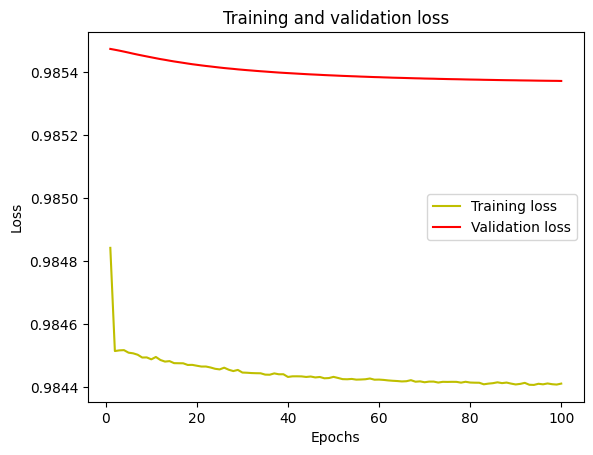

In [40]:
# convert the history.history dict to pandas dict DataFrame and save as csv for future plotting
ARU_model_df = pd.DataFrame(ARU_model_history.history) 

with open('ARU_model_df.csv', mode='w') as f:
    ARU_model_df.to_csv(f)


#display the history for val_loss and loss
history = ARU_model_history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Load Model and predict results

In [41]:
# load model
model = tf.keras.models.load_model('/content/Unet_model_100epochs.hdf5')

ValueError: ignored

In [ ]:
for i in range(X_test.shape[0]):
    ground_truth=y_test[i]
    #test_img_norm=test_img[:,:,0][:,:,None]

    plt.title('Testing Label')
    plt.imshow(ground_truth[:,:,0], cmap='gray')
    plt.show()

1/1 [==============================] - 3s 3s/step


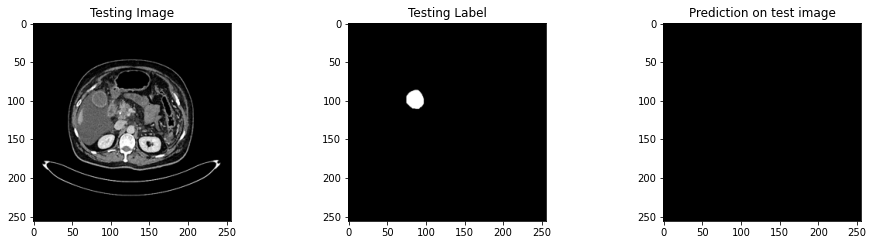

1/1 [==============================] - 0s 29ms/step


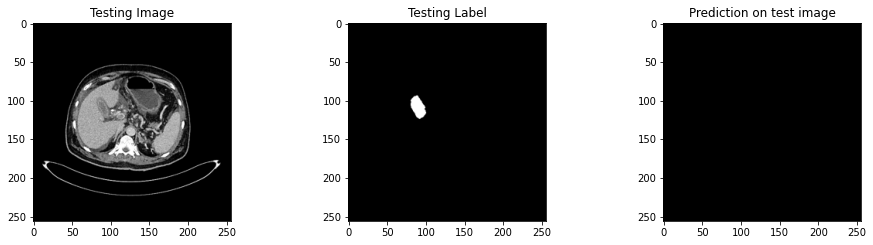

1/1 [==============================] - 0s 28ms/step


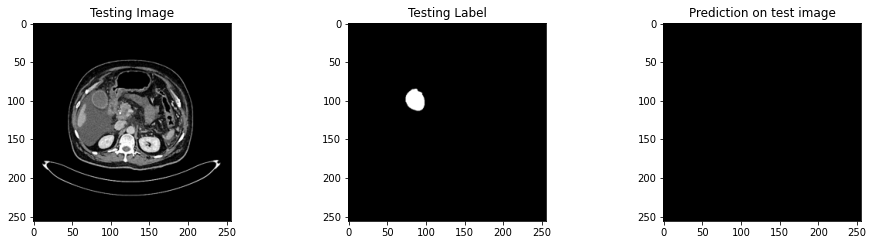

1/1 [==============================] - 0s 29ms/step


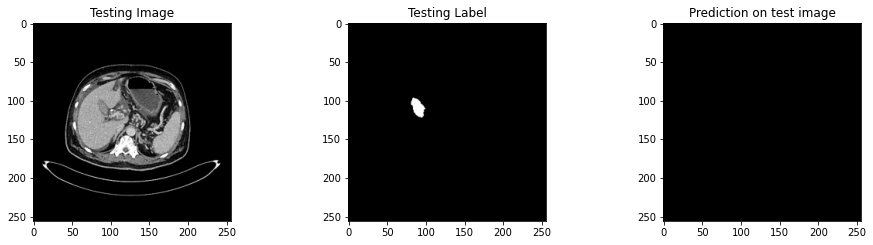

1/1 [==============================] - 0s 31ms/step


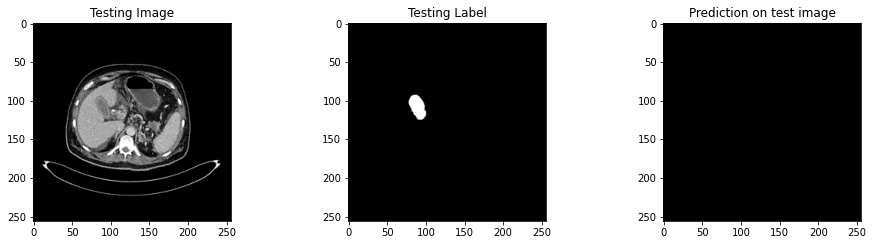

In [ ]:
for i in range(5):
    test_img_number = random.randint(0, X_test.shape[0]-1)

    test_img = X_test[test_img_number]
    ground_truth=y_test[test_img_number]
    #test_img_norm=test_img[:,:,0][:,:,None]
    test_img_input=np.expand_dims(test_img, 0)
    prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(test_img, cmap='gray')
    plt.subplot(232)
    plt.title('Testing Label')
    plt.imshow(ground_truth[:,:,0], cmap='gray')
    plt.subplot(233)
    plt.title('Prediction on test image')
    plt.imshow(prediction, cmap='gray')

    plt.show()

In [ ]:
#IoU for a single image
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(ground_truth[:,:,0], prediction)
print("Mean IoU =", IOU_keras.result().numpy())


#Calculate IoU and average
 
import pandas as pd

IoU_values = []
for img in range(0, X_test.shape[0]):
    temp_img = X_test[img]
    ground_truth=y_test[img]
    temp_img_input=np.expand_dims(temp_img, 0)
    prediction = (model.predict(temp_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
    
    IoU = MeanIoU(num_classes=n_classes)
    IoU.update_state(ground_truth[:,:,0], prediction)
    IoU = IoU.result().numpy()
    IoU_values.append(IoU)

    #print(IoU)
    


df = pd.DataFrame(IoU_values, columns=["IoU"])
df = df[df.IoU != 1.0]    
mean_IoU = df.mean().values
print("Mean IoU is: ", mean_IoU) 

Mean IoU = 0.49677277
1/1 [==============================] - 0s 42ms/step
Mean IoU is:  [0.49647212]
